This project is from the Udemy course: 2022 Python for Machine Learning & Data Science Masterclass. The course is put on by Pierian Data. Visit their website for more information.
http://www.pieriandata.com
___

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive, set up a model. The model should be able to read a new text review and give it a label of positive or negative.

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**

I import the libraries that I think I will need as I explore the data set.

In [1]:
# CODE HERE
import numpy as np
import pandas as pd

I use pandas to read in the data and put it in a data frame.

In [2]:
df = pd.read_csv('moviereviews.csv')

Look the the first few lines to understand a little of data I will be working with.

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


I look at the number of rows that is in the data set.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


**TASK: Check to see if there are any missing values in the dataframe.**

I use .isnull() to check for the missing values. I add .sum() to total up the boolean values of the .isnull() function. 

In [5]:
#CODE HERE
df.isnull().sum()

label      0
review    35
dtype: int64

Looks like there are 35 NaN or missing text reviews. The label is filled for all the rows.

**TASK: Remove any reviews that are NaN**

I use .dropna() to remove all the rows missing the review text.

In [6]:
df = df.dropna()

Let's check to make sure the rows were removed.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


Looks good so I move forward.

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

After taking a look at the Pandas documentation as the instruction's hint suggested. I put together this lambda function to check for blanks or spaces in the review text. 

In [8]:
df.apply(lambda entry: entry.str.isspace(), axis=1).sum()

label      0
review    27
dtype: int64

Looks like there are 27 blank or space reviews. Now that I know they are only in the 'review' column, I can filter them using the review column.

In [9]:
df['review'].str.isspace().sum()

27

I can also look at all 27 entries.

In [10]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


Now I want to remove these blank entries. I use a bitwise negation (~) to highlight the rows to remove. For a bitwise negation, each bit position in the result is the logical negation of the bit in the corresponding position of the operand. (1 if 0, 0 if 1.)

In [11]:
df = df[~df['review'].str.isspace()] 

Look at the data information again to see if the rows have been removed.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


1965 before and 1938 now, that makes 27 for the blank/space rows.

**TASK: Confirm the value counts per label:**

I use the 'label' column to count the positive and negative labeled reviews.

In [13]:
#CODE HERE
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

It appears there are the same number of positive and negative labeled reviews.

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

After reading the hint, which is a link to a Stack Overflow post on using scikit-learn's CountVectorizer to get a group of common words. I start by importing the tool from scikit-learn.

In [14]:
#CODE HERE
from sklearn.feature_extraction.text import CountVectorizer


Assign the model to a variable.

In [15]:
cv=CountVectorizer(stop_words='english')

Copy over the steps from the StackOverflow post and adjust them to the data set I'm working with.

In [16]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


Now we have a list of the top words in the negative reviews and number of uses. Next I do the same thing adjusted for the positive reviews.

In [17]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


Its interesting to see that some of the same top works are used in both the negative and positive reviews.

### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

I start by assigning the 'review' column to X (for features) and the 'label' to y (for label or output). 

In [18]:
#CODE HERE
X=df['review']
y=df['label']

Import the model from scikit-learn to prepare the data set.

In [19]:
from sklearn.model_selection import train_test_split

Use tuple unpacking to divide the data into train and test sets. I also set the test size at 20% and random_state to 101 to match the request of the instructor.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

I import the tools that I will need to process the data. Pipeline to be able to step through the data and then analyze it. The TfidfVectorizer to look and the frequency of each term and see how rare that word is in relation to the entire set, then assigning a value to that word. I will use a Linear Support Vector Classifier as my model to predict the label for the text.

In [21]:
#CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

I set up the pipeline to transform the data and run it through the model.

In [44]:
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('svc', LinearSVC()),])

Train the pipeline with the training part of the data set.

In [45]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

Import metrics to see how the system is performing.

In [24]:
#CODE HERE
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

Use the pipeline to predict some labels, based on the unseen test data.

In [46]:
p_preds = pipe.predict(X_test)

Print out the classification report to see how the mode is performing.

In [47]:
print(classification_report(y_test,p_preds))

              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



Looks like the model is 82% accurate with a okay balance between precision and recall. The model could probably use some parameter adjustment to bring the precision and recall percentages closer to each other.

Next I look at the performance in a chart called the confusion matrix.

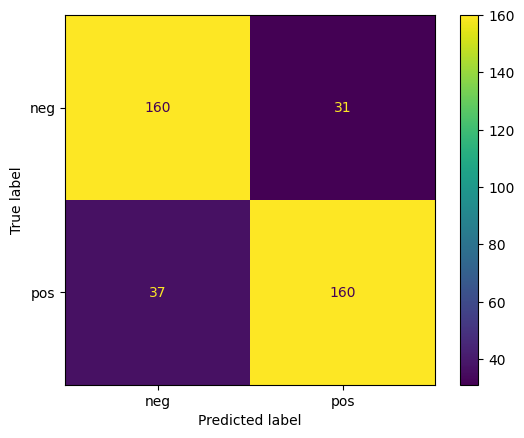

In [48]:
ConfusionMatrixDisplay.from_estimator(pipe,X_test,y_test);

This visualization helps me see that the model has a few false positives and a few false negatives. For a large portion of the data, the model was able to correctly assign a positive or negative label to the text review.

Did I choose the right model to use with this data?  
Let's look at a couple more models to see if there is one that would perform better for this data set.

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Setup the data to work with each of the models.

In [29]:
tfidf = TfidfVectorizer(stop_words='english')  # may want to try using stop_words argument to see how it affects performance.

In [30]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [31]:
X_test_tfidf = tfidf.transform(X_test)

Setup a report function to see the performance of each model.

In [32]:
def report_perf (model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_estimator(model,X_test_tfidf,y_test)

I will run this function after setting up the models so that the results of each are close to each other.

First I will look at the Naive Bayes model.

In [33]:
nb=MultinomialNB()

Train the model on the training data set.

In [34]:
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

Next the Logistic Regression model.

In [35]:
log_m = LogisticRegression(max_iter = 1000)

In [36]:
log_m.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

Then the Support Vector Classifier model.

In [37]:
svc_m=SVC()

In [38]:
svc_m.fit(X_train_tfidf,y_train)

SVC()

Now the models are setup, I will run the report function to get the performance metrics for each model.

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



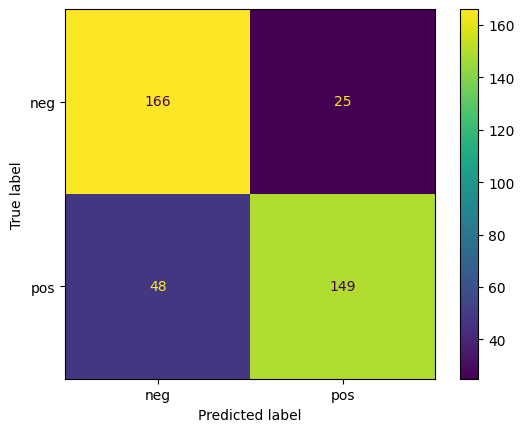

In [39]:
report_perf(nb)

              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



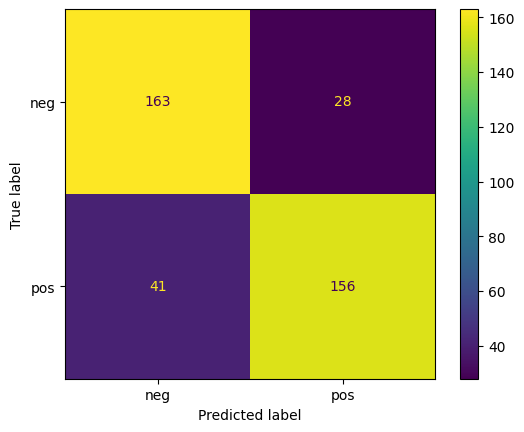

In [40]:
report_perf(log_m)

              precision    recall  f1-score   support

         neg       0.81      0.84      0.83       191
         pos       0.84      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



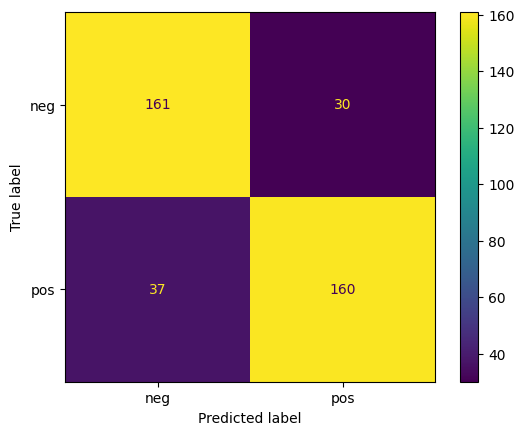

In [41]:
report_perf(svc_m)

The SVC model seemed to perform the best at initial use. Let's now test out the model with our own text review input.

In [49]:
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('svc', SVC()),])

In [51]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', SVC())])

In [54]:
pipe.predict(['That movie had some really bad acting'])

array(['neg'], dtype=object)

The prediction seems to work for a negative review. How about a positive one.

In [56]:
pipe.predict(['This was a great feel good movie'])

array(['pos'], dtype=object)

Looks like it works for a positive review.

### Conclusion  
The goal was reached, the model is able to take in a text form review statement and identify it as a positive or negative review. The models could use some refinement by adjusting the parameters. These could be studied through the use of a grid search to find the optimum parameters to use for the data set.

### Thanks for viewing my exercise project!